### Student Information
Name:

Student ID: Travis Simelane

GitHub ID: #149080015

Kaggle name: Travis Simelane

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the DM2023-Lab2-master. You may need to copy some cells from the Lab notebook to this notebook.


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2) regarding Emotion Recognition on Twitter by this link https://www.kaggle.com/t/09b1d0f3f8584d06848252277cb535f2. The scoring will be given according to your place in the Private Leaderboard ranking:
    - **Bottom 40%**: Get 20% of the 30% available for this section.

    - **Top 41% - 100%**: Get (60-x)/6 + 20 points, where x is your ranking in the leaderboard (ie. If you rank 3rd your score will be (60-3)/6 + 20 = 29.5% out of 30%)   
    Submit your last submission __BEFORE the deadline (Dec. 27th 11:59 pm, Wednesday)_. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained.


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


Upload your files to your repository then submit the link to it on the corresponding e-learn assignment.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 31th 11:59 pm, Sunday)__.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups
import matplotlib.pyplot as plt
%matplotlib inline
import nltk
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import math
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
import sklearn.feature_extraction.text
import pandas as pd
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import confusion_matrix
from collections import Counter
import seaborn as sns
from nltk import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer
import keras
from nltk import word_tokenize
from sklearn.tree import DecisionTreeClassifier
import keras


In [3]:
### Begin Assignment Here
import pandas as pd
# train data
anger_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/anger-ratings-0to1.train.txt",
                         sep="\t", header=None,names=["id", "text", "emotion", "intensity"])
sadness_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/sadness-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/fear-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/joy-ratings-0to1.train.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

train_df = pd.concat([anger_train, fear_train, joy_train, sadness_train], ignore_index=True)

### test data
anger_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/semeval/dev/anger-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
sadness_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/semeval/dev/sadness-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
fear_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/semeval/dev/fear-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])
joy_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/semeval/dev/joy-ratings-0to1.dev.gold.txt",
                         sep="\t", header=None, names=["id", "text", "emotion", "intensity"])

test_df = pd.concat([anger_test, fear_test, joy_test, sadness_test], ignore_index=True)


In [4]:
# shuffle around both dataset
train_df = train_df.sample(frac=1)
test_df = test_df.sample(frac=1)

EXERCISE 1 Plotting Frequency for top 30 WOrds in both train and test data

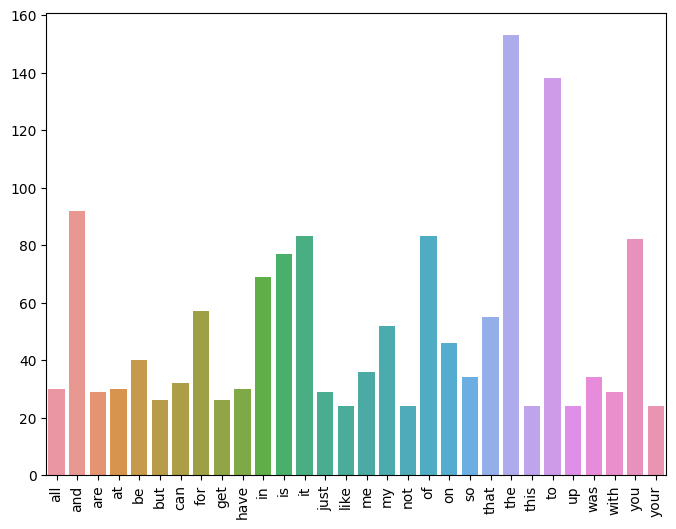

In [5]:
# Plotting graph for top 30 words for test data
count_vect_test = CountVectorizer(max_features = 30)
X_counts_test = count_vect_test.fit_transform(test_df.text)

term_frequencies = []
for j in range(0,X_counts_test.shape[1]):
    term_frequencies.append(sum(X_counts_test[:,j].toarray()))

term_frequencies = np.asarray(X_counts_test.sum(axis=0))[0]


plt.subplots(figsize=(8, 6))
g = sns.barplot(x=count_vect_test.get_feature_names_out()[:],
            y=term_frequencies[:])
g.set_xticklabels(count_vect_test.get_feature_names_out()[:], rotation = 90);



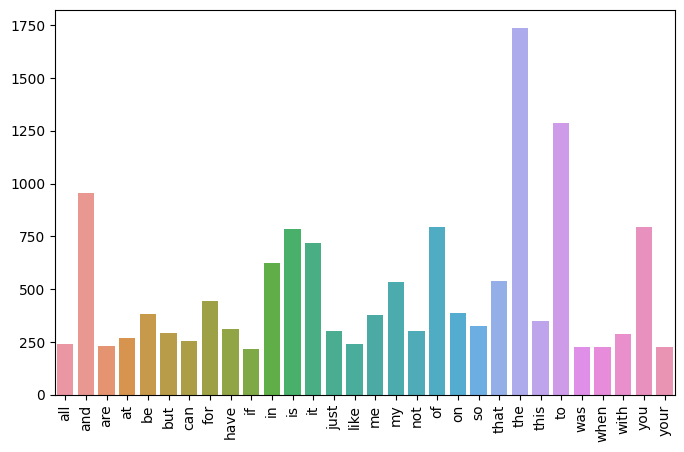

In [6]:
# Plotting graph for top 30 words for train data
count_vect_train = CountVectorizer(max_features = 30)
X_counts_train = count_vect_train.fit_transform(train_df.text)

term_frequencies = []
for j in range(0,X_counts_train.shape[1]):
    term_frequencies.append(sum(X_counts_train[:,j].toarray()))

term_frequencies = np.asarray(X_counts_train.sum(axis=0))[0]

plt.subplots(figsize=(8, 5))
g = sns.barplot(x=count_vect_train.get_feature_names_out()[:],
            y=term_frequencies[:])
g.set_xticklabels(count_vect_train.get_feature_names_out()[:], rotation = 90);

EXERCISE 2. Generate Word Embedding using TF-IDF Vecotrizer Instead of Bag Of words

In [7]:
import nltk
nltk.download('punkt')

tfidf_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize)
tfidf_1000.fit(train_df['text'])

feature_names_500 = tfidf_1000.get_feature_names_out()
feature_names_500[100:110]

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


array(['awful', 'b', 'baby', 'back', 'bad', 'ball', 'balls', 'bb18', 'bc',
       'bday'], dtype=object)

EXERCISE 3 INTERPRET THE CONFUSION MATRIX RESULTS  

Confusion matrix used to visualize the performance of an algorithm. The diagonal cells (from top left to bottom right) show the number of correct predictions for each class i.e. the true positives (TPs). The off-diagonal elements show the misclassifications. For example, in our coonfusion matrix 'anger' was incorrectly predicted as 'fear' 20 times, as 'joy' 5 times, and as 'sadness' 4 times. The lower the number or value of misclassification, the better the model is at distinguishing classes. The color intensity represents the magnitude of the values, with darker colors representing higher numbers or values. From the confusion matrix we can deduce that the model performs best at identifying fear with 76 True Positives and is worse at identifying sadness with 44 Trues Positives, while having relativlely low number of False negatives(other values in the fear row). The model struggles with distinguishing 'joy' from 'sadness' and 'fear', as indicated by the higher numbers of false positives and false negatives in these categories. 'Joy' seems to be the most difficult emotion for the model to predict accurately, as indicated by the lower true positive rate and higher rates of false positives and negatives.

In [8]:
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
from sklearn.tree import DecisionTreeClassifier
BOW_500.fit(train_df['text'])
# for a classificaiton problem, you need to provide both training & testing data
X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


EXERCISE 4. Build Model Using Naive Bayes Model and Train it. What are the testing results?

The model has 55 true positives, indicating it correctly predicted 'anger' 55 times. Fear has 85 true positives, the model is most accurate in predicting 'fear'. Joy has 56 true positives, which could suggest a moderate level of accuracy. The model correctly predicted 'sadness' 46 times, which is the least accurate among the four emotions but still represents a reasonably good number of correct predictions. When it comes to the misclassifications, the model tends to confuse 'anger' with 'fear' (15 times) and 'sadness' (9 times) somewhat frequently which are both False Positives. 'Fear' is occasionally misclassified as 'anger' (9 times) and 'sadness' (11 times), which are False Negatives, but the model is quite robust in identifying 'fear' overall. 'Joy' is more often confused with 'anger' (11 times) than with other emotions which is considered a False Negative. 'Sadness' is sometimes mistaken for 'anger' (12 times) and 'fear' (10 times), which are also considered False Negatives. The model displays a strong ability to correctly classify 'fear', which might suggest that  features associated with 'fear' are well captured by the model or are more distinct compared to other emotions. The misclassification rates are relatively low, but there exists some confusion still between 'anger', 'joy', and 'sadness'. In general the Naive Bayes confusion matrix indicates that the model is quite good at predicting 'fear' and performs reasonably well for other emotions as well.

In [9]:

from sklearn.tree import DecisionTreeClassifier

model_naive = MultinomialNB(alpha=1)

model_naive.fit(X_train, y_train)

y_train_pred = model_naive.predict(X_train)
y_test_pred = model_naive.predict(X_test)


In [10]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_true=y_test, y_pred=y_test_pred)

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import itertools

def plot_confusion_matrix(cm, classes, title='Confusion matrix',
                          cmap=sns.cubehelix_palette(as_cmap=True)):
    """
    This function is modified from:
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    """
    classes.sort()
    tick_marks = np.arange(len(classes))

    fig, ax = plt.subplots(figsize=(5,5))
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           xticklabels = classes,
           yticklabels = classes,
           title = title,
           xlabel = 'True label',
           ylabel = 'Predicted label')

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt), horizontalalignment="center", color="white" if cm[i, j] > thresh else "black")
    ylim_top = len(classes) - 0.5
    plt.ylim([ylim_top, -.5])
    plt.tight_layout()
    plt.show()

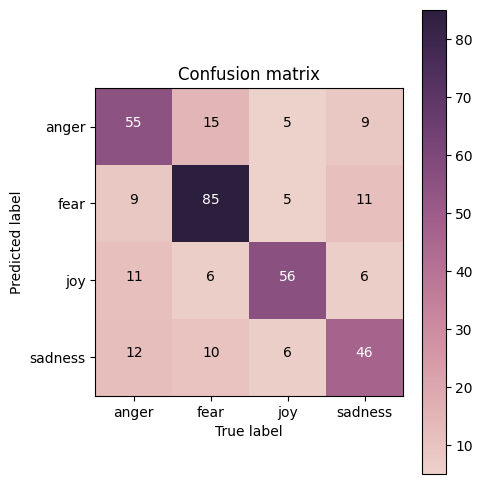

In [11]:
my_tags = ['anger', 'fear', 'joy', 'sadness']
plot_confusion_matrix(cm, classes=my_tags, title='Confusion matrix')

Exercise 5. How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model correctly predicted 'anger' 55 times, similar to the Decision Tree(DT) matrix. There is an improvement in predicting 'fear', with 85 correct predictions compared to 76 from the DT matrix. The model's ability to predict 'joy' correctly increased slightly. There is a slight improvement in predicting 'sadness', with 46 correct predictions compared to 44 in the first matrix. The number of times 'anger' was confused with 'fear' decreased from 20 to 15. Fear' being misclassified as 'anger' decreased from 16 to 9. Misclassifications between 'joy' and 'sadness' seem to have decreased, with 'joy' being misclassified as 'sadness' 6 times, down from 10. However, 'sadness' being misclassified as 'joy' has not improved, which remains at 6 instances. This model appears to have a better overall performance when compared to themone above.It has higher true positives and generally fewer misclassifications which suggests that The Naive Bayes classifier seems to be better balanced across classes, thus reducing the number of false positives and false negatives for most classes. In general the model has improved accuracy for all classes and reduced misclassification rates, indicating a more balanced and effective model for this particular task.

In [12]:
import keras
from nltk import word_tokenize
from sklearn.tree import DecisionTreeClassifier
BOW_500 = CountVectorizer(max_features=500, tokenizer=nltk.word_tokenize)
BOW_500.fit(train_df['text'])

X_train = BOW_500.transform(train_df['text'])
y_train = train_df['emotion']

X_test = BOW_500.transform(test_df['text'])
y_test = test_df['emotion']


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [13]:
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
label_encoder = LabelEncoder()
label_encoder.fit(y_train)

def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)

y_train = label_encode(label_encoder, y_train)
y_test = label_encode(label_encoder, y_test)

input_shape = X_train.shape[1]

output_shape = len(label_encoder.classes_)

In [ ]:
from keras.models import Model
from keras.layers import Input, Dense
from keras.layers import ReLU, Softmax

# input layer
model_input = Input(shape=(input_shape, ))  # 500
X = model_input

# 1st hidden layer
X_W1 = Dense(units=64)(X)  # 64
H1 = ReLU()(X_W1)

# 2nd hidden layer
H1_W2 = Dense(units=64)(H1)  # 64
H2 = ReLU()(H1_W2)

# output layer
H2_W3 = Dense(units=output_shape)(H2)  # 4
H3 = Softmax()(H2_W3)

model_output = H3

# create model
model = Model(inputs=[model_input], outputs=[model_output])

# loss function & optimizer
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [15]:
from keras.callbacks import CSVLogger

csv_logger = CSVLogger('/content/drive/MyDrive/Colab Notebooks/semeval/training_log_1.csv')

# training setting
epochs = 25
batch_size = 32

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    callbacks=[csv_logger],
                    validation_data = (X_test, y_test))

Epoch 1/25
113/113 [==============================] - 2s 8ms/step - loss: 1.3260 - accuracy: 0.3731 - val_loss: 1.2556 - val_accuracy: 0.4928
Epoch 2/25
113/113 [==============================] - 0s 3ms/step - loss: 0.9927 - accuracy: 0.6405 - val_loss: 0.9135 - val_accuracy: 0.6686
Epoch 3/25
113/113 [==============================] - 0s 4ms/step - loss: 0.5877 - accuracy: 0.7941 - val_loss: 0.7783 - val_accuracy: 0.7032
Epoch 4/25
113/113 [==============================] - 0s 4ms/step - loss: 0.4201 - accuracy: 0.8456 - val_loss: 0.7960 - val_accuracy: 0.7089
Epoch 5/25
113/113 [==============================] - 0s 4ms/step - loss: 0.3384 - accuracy: 0.8760 - val_loss: 0.8121 - val_accuracy: 0.6801
Epoch 6/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2789 - accuracy: 0.9064 - val_loss: 0.8907 - val_accuracy: 0.6801
Epoch 7/25
113/113 [==============================] - 0s 3ms/step - loss: 0.2346 - accuracy: 0.9192 - val_loss: 0.8995 - val_accuracy: 0.6830
Epoch 

In [16]:
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

3/3 [==============================] - 0s 4ms/step


array([[5.8761540e-10, 9.9999148e-01, 6.3879043e-06, 2.0457587e-06],
       [1.2399422e-03, 7.0760220e-06, 4.4116483e-04, 9.9831182e-01],
       [3.7950824e-06, 1.8027452e-03, 4.5904625e-07, 9.9819297e-01],
       [8.9223053e-05, 1.3260501e-04, 2.0476054e-06, 9.9977612e-01],
       [1.6472413e-06, 6.3106986e-06, 9.9999195e-01, 1.7751050e-08]],
      dtype=float32)

In [17]:
training_log = pd.DataFrame()
training_log = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/semeval/training_log_1.csv")

Exercise 6. Plot the Training and Validation Accuracy and Loss (different plots), just like the images below.(Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?

For the Training vs Validation Accuracy graph the training accuracy is consistently increasing and levels off, which is a good sign that the model is learning from the training data. The validation accuracy starts lower and remains mostly flat throughout the training process. This large gap between training and validation accuracy suggests that the model is not generalizing well to new, unseen data. When it comes to the Training vs Validation loss graph, The training loss decreases sharply and then levels off. The validation loss decreases initially but then starts to increase, which is indicative of the model beginning to memorize the training data rather than actually learning general patterns.

Overfitting occurs when a model performs well on the training data but poorly on unseen data (validation or testing data). It means the model has learned the training data too well, including the noise and outliers, which are not considered general patterns. The accuracy graph shows a symptom of overfitting, where the training accuracy is much higher than the validation accuracy. The loss graph supports this, showing that validation loss increases as the epochs go by, while training loss decreases, indicating the model is fitting the training data more closely over time but failing to generalize.

<Axes: xlabel='epoch'>

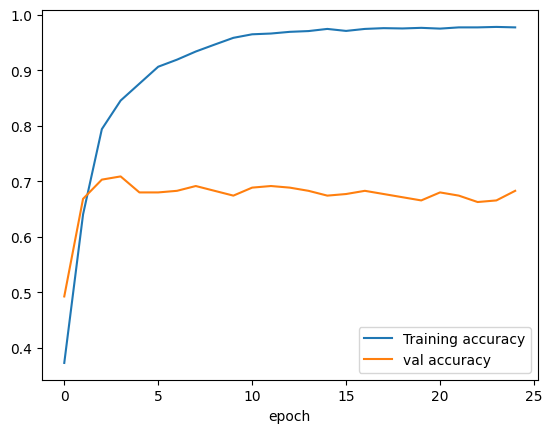

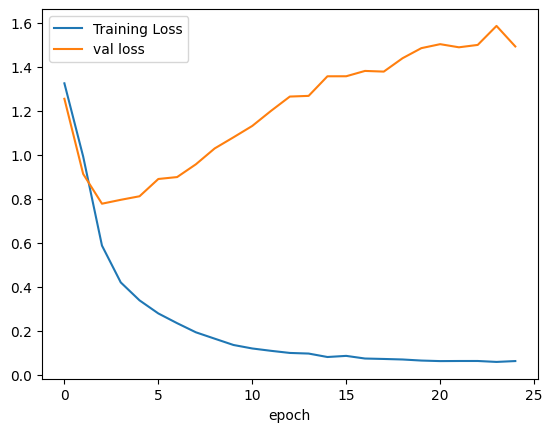

In [18]:
training_log.plot.line(x = "epoch",y = ["accuracy", "val_accuracy"], label=['Training accuracy','val accuracy'])
training_log.plot.line(x = "epoch",y = ["loss", "val_loss"], label=['Training Loss','val loss'])

Exercise 7 Now, we have the word vectors, but our input data is a sequence of words (or say sentence). How can we utilize these "word" vectors to represent the sentence data and train our model?

To use word vectors for representing sentences we need to convert the sequence of word vectors for each sentence into a single vector representation through a process is known as sentence embedding. One method to achieve this involves using the Weighted average of word vectors i.e. using a weighted average based on the importance of each word. THe word vectors are weighted by the TF-IDF (Term Frequency-Inverse Document Frequency) score of each word. Firstly, we would calculate the TF-IDF score for each word in the corpus using TfidfVectorizer. Then, for each word in a sentence, multiply its word vector by its TF-IDF score which weights words that are more unique to a document higher than common words. Then Finally, we take the average of these weighted word vectors to get a single vector representing the whole sentence.  

 Once  the sentences have been converted into vectors, we can use these vectors as features in the model.

In [19]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "/content/drive/MyDrive/Colab Notebooks/GoogleNews-vectors-negative300.bin.gz"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

Exercise 8

In [20]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

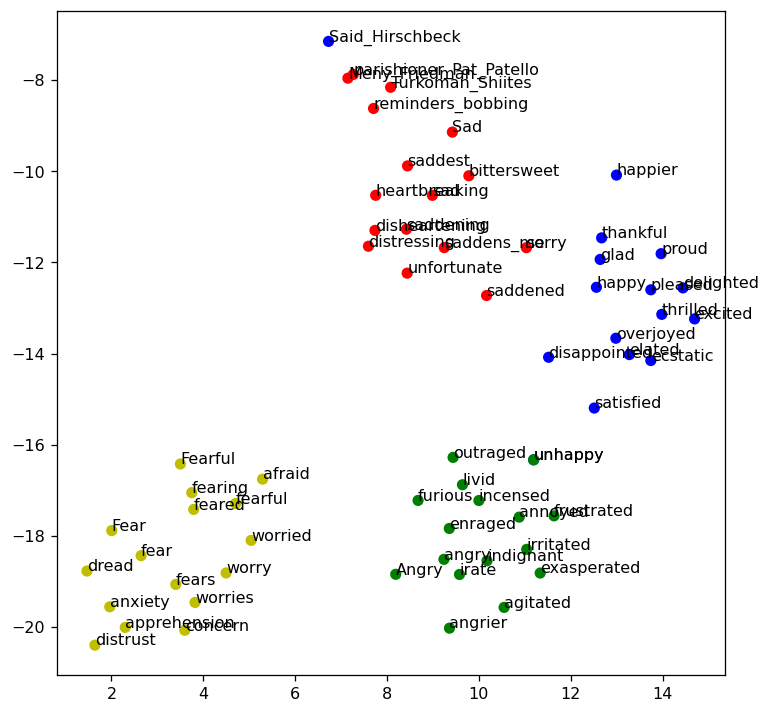

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 200
target_size = len(target_words)
all_word = list(model.index_to_key)
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

**PART 2 Twitter Data**

In [22]:
import json

# Opening JSON file
tweets = []
for line in open('/content/drive/MyDrive/Data/tweets_DM.json', 'r'):
    tweets.append(json.loads(line))


In [23]:
df = pd.DataFrame(tweets)

In [24]:
df

,_score,_index,_source,_crawldate,_type
0,391,hashtag_tweets,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47,tweets
1,433,hashtag_tweets,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09,tweets
2,232,hashtag_tweets,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20,tweets
3,376,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05,tweets
4,989,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59,tweets
...,...,...,...,...,...
1867530,827,hashtag_tweets,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52,tweets
1867531,368,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04,tweets
1867532,498,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32,tweets
1867533,840,hashtag_tweets,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06,tweets


In [25]:
#Remove unnecesary "_type" column
df = df.drop('_type', axis=1)

In [26]:
#Remove unnecesary "_index" column
df = df.drop('_index', axis=1)

In [27]:
df

,_score,_source,_crawldate
0,391,"{'tweet': {'hashtags': ['Snapchat'], 'tweet_id...",2015-05-23 11:42:47
1,433,"{'tweet': {'hashtags': ['freepress', 'TrumpLeg...",2016-01-28 04:52:09
2,232,"{'tweet': {'hashtags': ['bibleverse'], 'tweet_...",2017-12-25 04:39:20
3,376,"{'tweet': {'hashtags': [], 'tweet_id': '0x1cd5...",2016-01-24 23:53:05
4,989,"{'tweet': {'hashtags': [], 'tweet_id': '0x2de2...",2016-01-08 17:18:59
...,...,...,...
1867530,827,"{'tweet': {'hashtags': ['mixedfeeling', 'butim...",2015-05-12 12:51:52
1867531,368,"{'tweet': {'hashtags': [], 'tweet_id': '0x29d0...",2017-10-02 17:54:04
1867532,498,"{'tweet': {'hashtags': [], 'tweet_id': '0x2a6a...",2016-10-10 11:04:32
1867533,840,"{'tweet': {'hashtags': [], 'tweet_id': '0x24fa...",2016-09-02 14:25:06


In [28]:
#Convert "_source" column values to list
df_flatten = pd.DataFrame(df._source.values.tolist())
df_new = pd.DataFrame(df_flatten.tweet.values.tolist())

In [29]:
df_new

,hashtags,tweet_id,text
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ..."
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #..."
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k..."
3,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>
4,[],0x2de201,"""Trust is not the same as faith. A friend is s..."
...,...,...,...
1867530,"[mixedfeeling, butimTHATperson]",0x316b80,When you buy the last 2 tickets remaining for ...
1867531,[],0x29d0cb,I swear all this hard work gone pay off one da...
1867532,[],0x2a6a4f,@Parcel2Go no card left when I wasn't in so I ...
1867533,[],0x24faed,"Ah, corporate life, where you can date <LH> us..."


In [30]:
#import data indetification and emotion data
data_identification = pd.read_csv("/content/drive/MyDrive/Data/data_identification.csv")
emotion = pd.read_csv("/content/drive/MyDrive/Data/emotion.csv")

In [31]:
#merge tweets with data identification data on tweet_id
df_merge = pd.merge(df_new, data_identification, on=['tweet_id'])

In [32]:
#Splitting data frame into training and testing data
train_df = df_merge[df_merge['identification'] == 'train']
test_df = df_merge[df_merge['identification'] == 'test']

In [33]:
#merge training set with emotion labels
train_df = pd.merge(train_df, emotion, on=['tweet_id'])

In [34]:
train_df.to_pickle("train_df.pkl")
test_df.to_pickle("test_df.pkl")

In [35]:
train_df = pd.read_pickle("train_df.pkl")
test_df = pd.read_pickle("test_df.pkl")

In [36]:
train_df.head()

,hashtags,tweet_id,text,identification,emotion
0,[Snapchat],0x376b20,"People who post ""add me on #Snapchat"" must be ...",train,anticipation
1,"[freepress, TrumpLegacy, CNN]",0x2d5350,"@brianklaas As we see, Trump is dangerous to #...",train,sadness
2,[],0x1cd5b0,Now ISSA is stalking Tasha 😂😂😂 <LH>,train,fear
3,"[authentic, LaughOutLoud]",0x1d755c,@RISKshow @TheKevinAllison Thx for the BEST TI...,train,joy
4,[],0x2c91a8,Still waiting on those supplies Liscus. <LH>,train,anticipation


In [37]:
test_df.head()

,hashtags,tweet_id,text,identification
2,[bibleverse],0x28b412,"Confident of your obedience, I write to you, k...",test
4,[],0x2de201,"""Trust is not the same as faith. A friend is s...",test
9,"[materialism, money, possessions]",0x218443,When do you have enough ? When are you satisfi...,test
30,"[GodsPlan, GodsWork]",0x2939d5,"God woke you up, now chase the day #GodsPlan #...",test
33,[],0x26289a,"In these tough times, who do YOU turn to as yo...",test


In [1]:
#Setting up CountVectorizer for tokenization of text data
token_count = CountVectorizer(tokenizer= nltk.word_tokenize)

#Fit CountVectoriser on Training Data
token_count.fit(train_df['text'])

#Transform training data into Numerical Format
X_train = token_count.transform(train_df['text'])

#Setting Up training labels
y_train = train_df['emotion']
#Transform testing data into Numerical Format
X_test = token_count.transform(test_df['text'])

In [ ]:
print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)

In [ ]:
from sklearn.preprocessing import LabelEncoder
#intialize label encoder
label_encoder = LabelEncoder()
#Fit labelEncoder to training labels
label_encoder.fit(y_train)

#define label encoding function
def label_encode(le, labels):
    enc = le.transform(labels)
    return keras.utils.to_categorical(enc)

#define decoding function to reverse encoding
def label_decode(le, one_hot_label):
    dec = np.argmax(one_hot_label, axis=1)
    return le.inverse_transform(dec)
#encode labels
y_train = label_encode(label_encoder, y_train)

In [ ]:
input_shape = X_train.shape[1]
print('input_shape: ', input_shape)

output_shape = len(label_encoder.classes_)
print('output_shape: ', output_shape)

In [ ]:
from keras.models import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation, Dropout
from keras.layers import ReLU, Softmax

#building Neural Network Model
model = Sequential()
model.add(Dense(64, input_shape=(input_shape,)))
model.add(Activation('relu'))
model.add(Dropout(0.5)) #to prevent overfitting
model.add(Dense(32))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(units = output_shape))
model.add(Activation('softmax'))

#Compile model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# show model construction
model.summary()

In [ ]:
from keras.callbacks import CSVLogger

#Log training process
csv_logger = CSVLogger('logs/training_log.csv')

# training setting
epochs = 8
batch_size = 128

# training!
history = model.fit(X_train, y_train,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose = 1,
                    callbacks=[csv_logger],)
print('training finish')

In [ ]:
#Make predictions on the test data set. Display first 5 prediction results
pred_result = model.predict(X_test, batch_size=128)
pred_result[:5]

In [ ]:
#Decode predictions
pred_result = label_decode(label_encoder, pred_result)
pred_result[:5]

In [ ]:
#Prepare submission file
submit_df = pd.DataFrame()
submit_df['id'] = test_df['tweet_id']
submit_df['emotion'] = pred_result
submit_df.to_csv('out.csv', index = False)